In [1]:
import WindyGridWorld
import random
import numpy as np
import matplotlib.pyplot as plt
import updaters

In [2]:
d=320
def getFeatures(state,action):
    vect = np.zeros((320,1))
    if action == actions[0]:
        act_val=0
    elif action == actions[1]:
        act_val=1
    elif action == actions[2]:
        act_val=2
    elif action == actions[3]:
        act_val=3
    else:
        print("UNKNOWN ACTION",action)
    s_val = state[0]+10*state[1]+act_val*80
    vect[s_val]=1
    return vect

In [3]:
def getQVal(features,weights):
    return np.matmul(features.reshape((1,d)),weights.reshape((d,1)))

In [4]:
mdp = WindyGridWorld.mdp()
actions = ["UP","DOWN","LEFT","RIGHT"]

In [5]:
# Initial Policy
epsillon = 0.1
weights = np.zeros((d,1))#np.array([random.uniform(-1,1) for i in range(d)]).reshape((d,1))
policy = {}
for i in range(10):
    for j in range(8):
        best = None
        best_action=None
        for a in actions:
            q = getQVal(getFeatures((i,j),a),weights)
            if best==None or q>best:
                best = q
                best_action = a
        policy[(i,j)]=best_action

In [6]:
# Exp policy fully random
b_prob = 1/4
# Current policy -> policy, with eps greedy action selection: Each non fav is with prob p = eps/4
p_fav = 1-epsillon+epsillon/4
p_others = epsillon/4
ratio_fav = p_fav/b_prob
ratio_others = p_others/b_prob
discount = 1.0

In [7]:
def improvePolicy():
    for i in range(10):
        for j in range(8):
            best = None
            best_action=None
            for a in actions:
                q = getQVal(getFeatures((i,j),a),weights)
                if best==None or q>best:
                    best = q
                    best_action = a
            policy[(i,j)]=best_action

In [8]:
def improvePolicyForOne(state):
    best = None
    best_action=None
    for a in actions:
        q = getQVal(getFeatures(state,a),weights)
        if best==None or q>best:
            best = q
            best_action = a
    policy[state]=best_action

In [9]:
mdp=WindyGridWorld.mdp()
num_eps =100
a=0.01
updater = updaters.OffPolicyTD(a,discount,dim=320)
for e in range(num_eps):
    state = mdp.getStartState()
    newFeatures = getFeatures(state,policy[state])
    i=0
    while 1:
        i+=1
        prev = state
        ac = random.choice(actions)
        if ac==policy[state]:
            ratio = ratio_fav
        else:
            ratio = ratio_others
        oldFeatures=newFeatures
        state,r = mdp.getTransition(state,ac)
        newFeatures = getFeatures(state,ac)
        weights=updater.update(r,weights,oldFeatures,newFeatures,ratio)
        improvePolicyForOne(prev)
        if r==0:
            break
    #print(e,i)

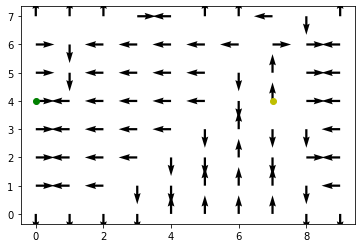

In [10]:
x1,y1 = np.meshgrid(np.arange(0, 10, 1), np.arange(0, 8, 1))
u = np.zeros(y1.shape)
v = np.zeros(y1.shape)
for i in range(10):
    for j in range(8):
        if policy[(i,j)]=="UP":
            u[j,i]=0
            v[j,i]=0.1
        elif policy[(i,j)]=="DOWN":
            u[j,i]=0
            v[j,i]=-0.1
        elif policy[(i,j)]=="RIGHT":
            u[j,i]=0.1
            v[j,i]=0
        elif policy[(i,j)]=="LEFT":
            u[j,i]=-0.1
            v[j,i]=0
        else:
            print("UNKNOWN ACTION",policy[(i,j)])


plt.quiver(x1,y1,u,v)
plt.plot(0,4,"go")
plt.plot(7,4,"yo")

In [11]:
improvePolicy()
weights = np.zeros((d,1))

In [12]:
num_eps=200
for e in range(num_eps):
    state = mdp.getStartState()
    newFeatures = getFeatures(state,policy[state])
    i=0
    while 1:
        i+=1
        prev = state
        ac = random.choice(actions)
        if ac==policy[state]:
            ratio = ratio_fav
        else:
            ratio = ratio_others
        oldFeatures=newFeatures
        state,r = mdp.getTransition(state,ac)
        newFeatures = getFeatures(state,ac)
        weights=updater.update(r,weights,oldFeatures,newFeatures,ratio)
        if r==0:
            break
    #print(e,i)

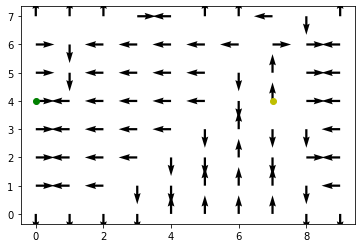

In [13]:
x1,y1 = np.meshgrid(np.arange(0, 10, 1), np.arange(0, 8, 1))
u = np.zeros(y1.shape)
v = np.zeros(y1.shape)
for i in range(10):
    for j in range(8):
        if policy[(i,j)]=="UP":
            u[j,i]=0
            v[j,i]=0.1
        elif policy[(i,j)]=="DOWN":
            u[j,i]=0
            v[j,i]=-0.1
        elif policy[(i,j)]=="RIGHT":
            u[j,i]=0.1
            v[j,i]=0
        elif policy[(i,j)]=="LEFT":
            u[j,i]=-0.1
            v[j,i]=0
        else:
            print("UNKNOWN ACTION",policy[(i,j)])


plt.quiver(x1,y1,u,v)
plt.plot(0,4,"go")
plt.plot(7,4,"yo")

In [14]:
improvePolicy()
weights = np.zeros((d,1))
num_eps=1000
for e in range(num_eps):
    state = mdp.getStartState()
    newFeatures = getFeatures(state,policy[state])
    i=0
    while 1:
        i+=1
        prev = state
        ac = random.choice(actions)
        if ac==policy[state]:
            ratio = ratio_fav
        else:
            ratio = ratio_others
        oldFeatures=newFeatures
        state,r = mdp.getTransition(state,ac)
        newFeatures = getFeatures(state,ac)
        weights=updater.update(r,weights,oldFeatures,newFeatures,ratio)
        #improvePolicyForOne(prev)
        if r==0:
            break

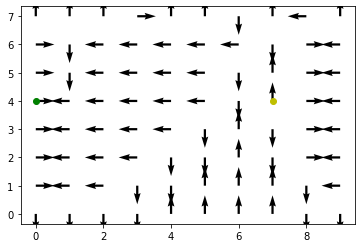

In [15]:
x1,y1 = np.meshgrid(np.arange(0, 10, 1), np.arange(0, 8, 1))
u = np.zeros(y1.shape)
v = np.zeros(y1.shape)
for i in range(10):
    for j in range(8):
        if policy[(i,j)]=="UP":
            u[j,i]=0
            v[j,i]=0.1
        elif policy[(i,j)]=="DOWN":
            u[j,i]=0
            v[j,i]=-0.1
        elif policy[(i,j)]=="RIGHT":
            u[j,i]=0.1
            v[j,i]=0
        elif policy[(i,j)]=="LEFT":
            u[j,i]=-0.1
            v[j,i]=0
        else:
            print("UNKNOWN ACTION",policy[(i,j)])


plt.quiver(x1,y1,u,v)
plt.plot(0,4,"go")
plt.plot(7,4,"yo")

In [ ]:
improvePolicy()
weights = np.zeros((d,1))
num_eps=1000
for e in range(num_eps):
    state = mdp.getStartState()
    newFeatures = getFeatures(state,policy[state])
    i=0
    while 1:
        i+=1
        prev = state
        ac = random.choice(actions)
        if ac==policy[state]:
            ratio = ratio_fav
        else:
            ratio = ratio_others
        oldFeatures=newFeatures
        state,r = mdp.getTransition(state,ac)
        newFeatures = getFeatures(state,ac)
        weights=updater.update(r,weights,oldFeatures,newFeatures,ratio)
        #improvePolicyForOne(prev)
        if r==0:
            break
    #print(e,i)
improvePolicy()
weights = np.zeros((d,1))

In [ ]:
e

In [ ]:
num_eps=1000
for e in range(num_eps):
    state = mdp.getStartState()
    newFeatures = getFeatures(state,policy[state])
    i=0
    while 1:
        i+=1
        prev = state
        ac = random.choice(actions)
        if ac==policy[state]:
            ratio = ratio_fav
        else:
            ratio = ratio_others
        oldFeatures=newFeatures
        state,r = mdp.getTransition(state,ac)
        newFeatures = getFeatures(state,ac)
        weights=updater.update(r,weights,oldFeatures,newFeatures,ratio)
        #improvePolicyForOne(prev)
        if r==0:
            break
    #print(e,i)
improvePolicy()
weights = np.zeros((d,1))

In [ ]:
num_eps=1
for e in range(num_eps):
    state = mdp.getStartState()
    newFeatures = getFeatures(state,policy[state])
    i=0
    while 1:
        i+=1
        prev = state
        if random.uniform(0,1)>epsillon:
            ac = policy[state]
        else:
            ac = random.choice(actions)
        ratio = 1.0
        oldFeatures=newFeatures
        state,r = mdp.getTransition(state,ac)
        newFeatures = getFeatures(state,ac)
        weights=updater.update(r,weights,oldFeatures,newFeatures,ratio)
        #improvePolicyForOne(prev)
        if r==0:
            break
    print(e,i)

In [ ]:
improvePolicy()
weights = np.zeros((d,1))
num_eps=2
for e in range(num_eps):
    state = mdp.getStartState()
    newFeatures = getFeatures(state,policy[state])
    i=0
    while 1:
        i+=1
        prev = state
        if random.uniform(0,1)>epsillon:
            ac = policy[state]
        else:
            ac = random.choice(actions)
        ratio = 1.0
        oldFeatures=newFeatures
        state,r = mdp.getTransition(state,ac)
        newFeatures = getFeatures(state,ac)
        weights=updater.update(r,weights,oldFeatures,newFeatures,ratio)
        #improvePolicyForOne(prev)
        if r==0:
            break
    print(e,i)

In [ ]:
improvePolicy()
num_eps=1000
for e in range(num_eps):
    state = mdp.getStartState()
    newFeatures = getFeatures(state,policy[state])
    i=0
    while 1:
        i+=1
        prev = state
        if random.uniform(0,1)>epsillon:
            ac = policy[state]
        else:
            ac = random.choice(actions)
        ratio = 1.0
        oldFeatures=newFeatures
        state,r = mdp.getTransition(state,ac)
        newFeatures = getFeatures(state,ac)
        weights=updater.update(r,weights,oldFeatures,newFeatures,ratio)
        improvePolicyForOne(prev)
        if r==0:
            break

In [ ]:
e

In [ ]:
improvePolicy()

In [ ]:
x1,y1 = np.meshgrid(np.arange(0, 10, 1), np.arange(0, 8, 1))
u = np.zeros(y1.shape)
v = np.zeros(y1.shape)
for i in range(10):
    for j in range(8):
        if policy[(i,j)]=="UP":
            u[j,i]=0
            v[j,i]=0.1
        elif policy[(i,j)]=="DOWN":
            u[j,i]=0
            v[j,i]=-0.1
        elif policy[(i,j)]=="RIGHT":
            u[j,i]=0.1
            v[j,i]=0
        elif policy[(i,j)]=="LEFT":
            u[j,i]=-0.1
            v[j,i]=0
        else:
            print("UNKNOWN ACTION",policy[(i,j)])


plt.quiver(x1,y1,u,v)
plt.plot(0,4,"go")
plt.plot(7,4,"yo")